# M2 Assignment: Cross Validation
Pujita Ravichandar

## I) Introduction

In this assignment, the concept of cross validation is applied during model training to assess the performance of a linear regression model when applied to power plant data. 

A cross validated linear regression model is constructed to predict the energy production of a power plant. The data set used is sourced from the UC Irvine machine learning archive: 

https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant# 

Attribute Descriptions:
Features consist of hourly average ambient variables

#### Explanatory Variables:
- **T:** Temperature in the range 1.81°C and 37.11°C,
- **AP:** Ambient Pressure in the range 992.89-1033.30 milibar,
- **RH:** Relative Humidity in the range 25.56% to 100.16%
- **V:** Exhaust Vacuum in teh range 25.36-81.56 cm Hg


#### Response Variable:
- **EP:** Net hourly electrical energy output 420.26-495.76 MW

## II) Exploratory Data Analysis

The purpose of this explanatory data analysis (EDA) is to understand the nature of the variables. In this exploration, the net energy output is the response variable and all other variables are explantory: temperature, ambient pressure, relative humidity, and exhaust vacuum. The data is brought into the Jupyter environment from a GitHub file.

In [1]:
# import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [4]:
# bring data into environment from GitHub
#df = pd.read_csv(r'https://raw.githubusercontent.com/pujitaravi/DAV-6150/main/M2_Data.csv')
df = pd.read_csv('/Users/Puji/Documents/GitHub/DAV-6150/M2_Data.csv')
df.head()

,T,V,AP,RH,EP
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   EP      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [6]:
df.describe()

,T,V,AP,RH,EP
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [7]:
df.isnull().sum()

T     0
V     0
AP    0
RH    0
EP    0
dtype: int64

The `info`, `describe`, and `isnull`, functions provide basic information about the data. This dataset has 9568 entires, is 373.9 KB, and contains 5 columns all of which are float data types. The `describe` function provides the basic satatistical information about the standard deviation, mean, and quartiles for each variable. From the `isnull` function, is it seen that there are no null values in any of the columns. Conveniently, there is no troubleshooting with regard to nulls or missing values. This is a good set up for the rest of the EDA process.

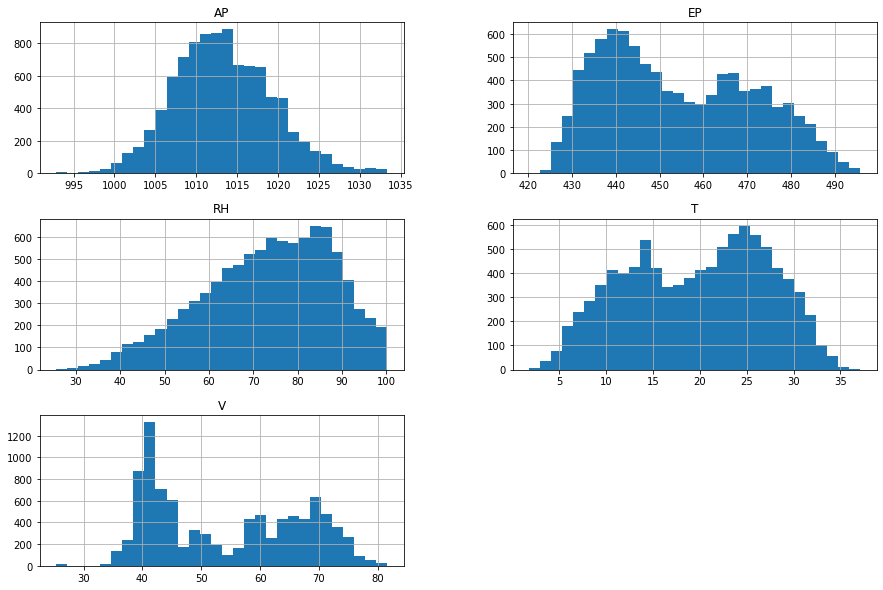

In [8]:
# plot histogram of all of the variables
df.hist(bins=30, figsize=(15,10))
plt.show()

The plots above show histogram for each of the variables. THis provides information about the distribution of the attributes. This is important basis information for any further statistical analysis.

Distributions appear to be as follows:
- **AP:** Unimodal and symmetric
- **RH:** Unimodal and left skewed
- **V :** Bimodal (it is a bit ambiguous, this could also be multi-modal)
- **EP:** Bimodal
- **T :** Bimodal

After understanding the distribution of the variables, the spcific relationship between the variables can be explored. All of the variables are numerical and continuous, so this calls for scatter plots. Because the response variable is EP (energy output), this variable will be plotted against the others. The four scatter plots are below.

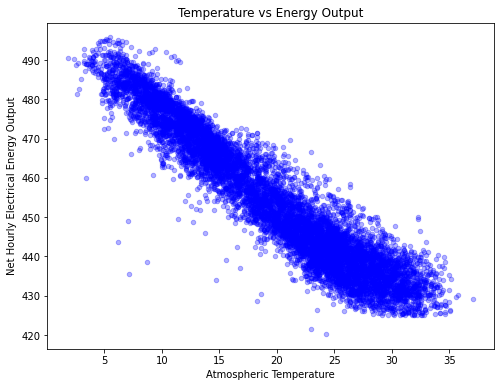

In [9]:
# scatter plots of variables vs. energy output
df.plot(x ='T', y = 'EP', kind ="scatter", figsize = [8,6], color ="b", alpha = 0.3)
plt.title("Temperature vs Energy Output")
plt.xlabel("Atmospheric Temperature") 
plt.ylabel("Net Hourly Electrical Energy Output")
plt.show()

This plot suggests that the atmospheric temperature and the net electrical energy output are strongly and inversly correlated.

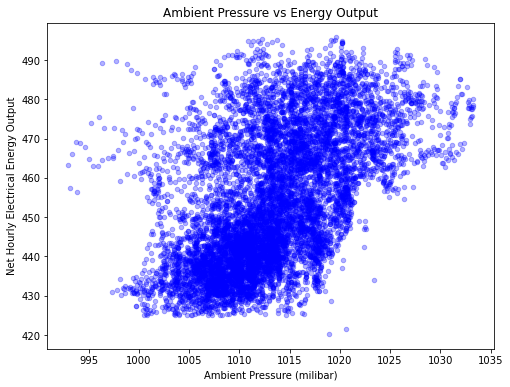

In [10]:
df.plot(x ='AP', y = 'EP', kind ="scatter", figsize = [8,6], color ="b", alpha = 0.3)
plt.title("Ambient Pressure vs Energy Output")
plt.xlabel("Ambient Pressure (milibar)") 
plt.ylabel("Net Hourly Electrical Energy Output")
plt.show()

This plot suggests that the ambient pressure and the net electrical energy output are very loosely and directly correlated.

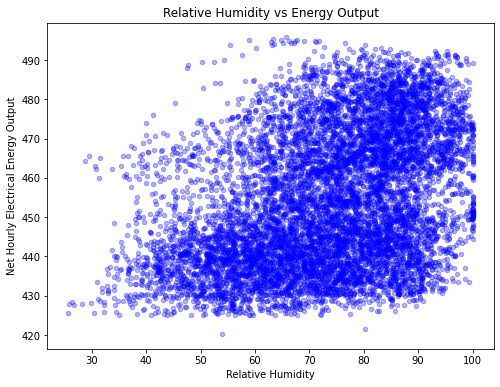

In [11]:
df.plot(x ='RH', y = 'EP', kind ="scatter", figsize = [8,6], color ="b", alpha = 0.3)
plt.title("Relative Humidity vs Energy Output")
plt.xlabel("Relative Humidity") 
plt.ylabel("Net Hourly Electrical Energy Output")
plt.show()

This plot suggests that the relative humidity and the net electrical energy output are not particularly correlated.

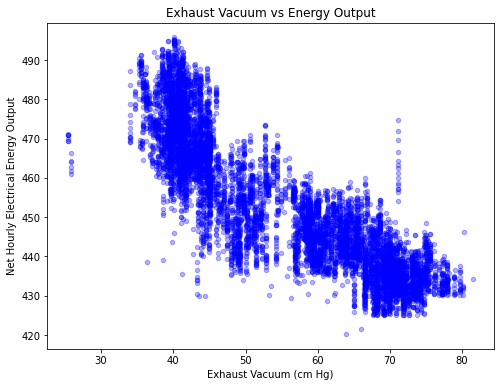

In [12]:
df.plot(x ='V', y = 'EP', kind ="scatter", figsize = [8,6], color ="b", alpha = 0.3)
plt.title("Exhaust Vacuum vs Energy Output")
plt.xlabel("Exhaust Vacuum (cm Hg)") 
plt.ylabel("Net Hourly Electrical Energy Output")
plt.show()

This plot suggests that the exhaust vacuum and the net electrical energy output are somewhat strongly and inversly correlated.

The plots provide a vague idea of how the variables are realted to the energy output. However, going off of visual assumptions is not very precise. Correlation values are useful to quantify the relationships between the variables. This matrix is plotted below.

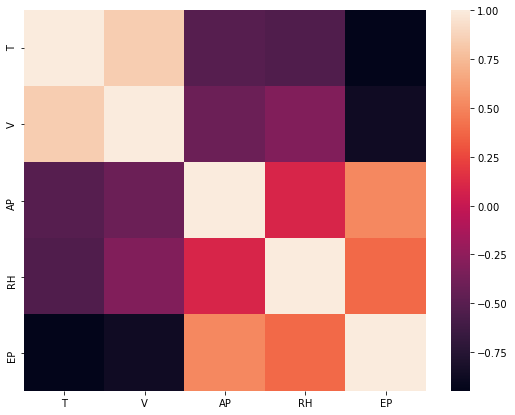

In [13]:
# plotting correlation matrix
corr = df.corr()
plt.figure(figsize = (9, 7))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
plt.show()

The focus is on the EP row and column. This matrix illustrates that the T and V have a strong negative correlation with the energy output, and AP and RH have a somewhat strong and weak positive correlation respectively. This matrix helps identify what variables are likely to produce good results when making a model.

## III) Regression Model Construction & Evaluation

This section outlines the two linear regression to predict the net hourly electrical energy output: one with explanatory variables T, V, and one with explanatory variables T, V, and AP. These selections are based on the EDA in the previous section. These models are evaluated using the k - fold cross validation. The k value chosen is 5 according to standard and to control high bais and high variance.

In [21]:
# copy original df
X = df.copy()

# drop response variable
X.drop('EP', axis=1, inplace=True)
X.head()

y = df[['EP']]

In [22]:
# split train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

For the split, the testing size is set to 30%.

### Regression 1

The first linear regression model to predict energy output uses 'T' and 'V' as explanatory variables. These are two highly correlated values to the EP, as outlined in the correlation matrix.

In [23]:
# use T and V for as explanatory variables
X_train1 = X_train[['T', 'V']]
X_test1 = X_test[['T', 'V']]

In [24]:
# linear regression
model = LinearRegression().fit(X_train1,y_train)

In [25]:
# calculate R2, slope, and intercept
r_sq = model.score(X_train1, y_train)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.9149445512900282
intercept: [505.48193589]
slope: [[-1.70087138 -0.32643356]]


The R^2 value, or the coefficient of determination is 0.9149.

In [26]:
# predict
y_pred = model.predict(X_test1)
print('predicted response:', y_pred, sep='\n')

predicted response:
[[440.33590315]
 [487.16788701]
 [432.65825176]
 ...
 [460.46501299]
 [432.95309628]
 [462.22222498]]


In [28]:
# use T and V for k fold
newX_train = X_train1.copy()
newX_train.head()

,T,V
1090,12.57,39.30
6137,25.27,69.89
4703,12.57,41.66
1901,13.80,39.82
3704,18.80,47.83


In [29]:
model = LinearRegression()

#find cross val score for k = 5
scores = cross_val_score(model, newX_train, y_train, cv=5)
print(scores)

[0.91014846 0.91535804 0.91601249 0.91769219 0.91494075]


In [30]:
np.mean(scores)

0.9148303865957537

Our 5-fold cross validation shows that our model has a cross validated accuracy of 91.5%. This value is similar to the coefficient of determination.

### Regression 2

The first linear regression model to predict energy output uses 'T', 'V', and 'AP; as explanatory variables. These are the three most highly correlated values to the EP, as outlined in the correlation matrix. These are the most promising attributes to use for model building.

In [31]:
#use T, V and AP as explanatory variables
X_train2 = X_train[['T', 'V', 'AP']]
X_test2 = X_test[['T', 'V', 'AP']]

model = LinearRegression().fit(X_train2,y_train)

In [32]:
# calculate R2, slope, and intercept 

r_sq = model.score(X_train2, y_train)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.9173813013720962
intercept: [337.16959521]
slope: [[-1.62950431 -0.32972639  0.16489318]]


The R^2 value, or the coefficient of determination is 0.9174.

In [33]:
# prediction
y_pred = model.predict(X_test2)
print('predicted response:', y_pred, sep='\n')

predicted response:
[[440.72180669]
 [486.68309606]
 [432.97265381]
 ...
 [462.11969105]
 [432.39735776]
 [463.87895067]]


In [34]:
# See our Squared Mean Error score and Root Mean Squared Error:
test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)

# See our Mean Absolute Error
test_mae = mean_absolute_error(y_test, y_pred)
print(f'the test MAE is: {test_mae}')

the test MAE is: 3.886607027663203


In [35]:
# k fold cross validation
newX_train = X_train2.copy()
newX_train.head()

,T,V,AP
1090,12.57,39.30,1019.57
6137,25.27,69.89,1015.21
4703,12.57,41.66,1009.11
1901,13.80,39.82,1012.37
3704,18.80,47.83,1005.86


In [36]:
model = LinearRegression()

# cross val score for k  = 5
scores = cross_val_score(model, newX_train, y_train, cv=5)
print(scores)

[0.91333502 0.91759835 0.91867513 0.92004528 0.91658955]


In [37]:
np.mean(scores)

0.917248664614732

Our 5-fold cross validation shows that our model has a cross validated accuracy of 91.73%. This value is similar to the coefficient of determination.

## IV) Conclusions

The K-Fold Cross Validation process helps identify the preferred model. From the two regressions carried out, the second one yeilds slightly better results. Further development of the models can be done as well. Using a k value of 10 is one possible direction to explore.